Updated Ml_Class_1.py so rerunning the classification algorithm compairison:

Additional algorithms are also tested this time around!

In [27]:
#Imports
import numpy as np
import pandas as pd
import sys, os, random
import importlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone


#Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC, NuSVC
# from sklearn.calibration import CalibratedClassifierCV #Not used
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Class Import
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../.."))) #Allow for imports from src
from src.models import ML_Class_1
importlib.reload(ML_Class_1) #Ensures file is uptodate!
from src.models.ML_Class_1 import Model_Tester

#Set Seed
os.environ["PYTHONHASHSEED"] = "1945"
random.seed(1945)
np.random.seed(1945)


In [3]:
#Complied data of convoys
#Routes examined are HX, SC, OB, ON, ONS
df = pd.read_csv('/Users/matthewplambeck/Desktop/Convoy Predictor/data/processed/Complete_Convoy_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
df.shape #Test

(1174, 21)

In [4]:
#Drop unecessary/redundent features
df = df.drop(columns=['Convoy Number', 'Number of Ships Sunk', 'Depart_Date', 'Arrival/Dispersal Date', 'Number of Escorts Sunk', \
                         'Number of Stragglers Sunk', 'Total Tons of Ships Sunk', 'Escort Sink Percentage', 'Straggler Sink Percentage'])
df.reset_index(drop=True).head(3)

,Number of Ships,Number of Escort Ships,Number of Stragglers,Total Tons of Convoy,Overall Sink Percentage,Avg Number of U-Boats in Atlantic,Escort Ratio,Time At Sea (Days),Month,Year,Previous Month Avg Sink %,Approx. Sighting Range
0,5.0,2.0,0.0,22877.0,0.0,6.0,0.400000,3.0,9.0,1939.0,0.0,12.190200
1,5.0,2.0,0.0,22967.0,0.0,6.0,0.400000,5.0,9.0,1939.0,0.0,12.190200
2,7.0,4.0,0.0,21293.0,0.0,6.0,0.571429,5.0,9.0,1939.0,0.0,14.434062


In [5]:
#Convert Overall Sink Percentage to binary 1( High)
df['Risk'] = (df['Overall Sink Percentage'] > 0).astype(int) 
#Risk is binary based off whether a ship was sunk while in a convoy:  (0 = No Ships Sunk, 1 = At Least One Ship Sunk)
X = np.array(df.drop(columns=['Overall Sink Percentage', 'Risk'])) #Remove Overall Sink Percentage as it leaks data
y = df['Risk'].values #Prediction value

In [6]:
#Intiate and perfrom train test split on data set
base_tester = Model_Tester()
base_tester.train_test_split(X, y)

In [ ]:
#Base Line Test of ALL algorthims (Phase 2)
classifiers = [
    #Linear Models:
    ("LogReg", LogisticRegression(random_state=1945, max_iter=1600)),
    ("SGDC", SGDClassifier(random_state=1945)),
    #SVM Models:
    ("LinSVC", LinearSVC(random_state=1945)),
    ("SVC", SVC(random_state=1945, probability=True)),
    ("NuSVS", NuSVC(nu=0.2, random_state=1945, probability=True)), #First attempt failed with nu=0.5, will change to nu=0.2
    #Neighbor Models
    ("KN", KNeighborsClassifier()),
    ("RN", RadiusNeighborsClassifier(radius=6)), #radius=2 picked at random Failed first time, will increase radius to 6
    #Trees & Ensembles
    ("DecT", DecisionTreeClassifier(random_state=1945)),
    ("RanF", RandomForestClassifier(random_state=1945)),
    ("ExT", ExtraTreesClassifier(random_state=1945)),
    ("Bag", BaggingClassifier(random_state=1945)),
    ("GB", GradientBoostingClassifier(random_state=1945)),
    ("AdaB", AdaBoostClassifier(random_state=1945)),
    #Naive Bayes
    ("GauNB", GaussianNB()),
    ("BerNB", BernoulliNB()),
    ("ComNb", ComplementNB()),
    #Discriminant analysis
    ("LinD", LinearDiscriminantAnalysis()),
    ("QuadD", QuadraticDiscriminantAnalysis()),
    #Sklearn Neural Network
    ("MLP NN", MLPClassifier(random_state=1945, max_iter=2000))
    ]


#Algorithms Tested:

# # Linear models
# LogisticRegression(random_state=1945, max_iter=1600)
# SGDClassifier(random_state=1945)

# # SVM family
# LinearSVC(random_state=1945)
# SVC(random_state=1945, probability=True)
# NuSVC(nu=0.2, random_state=1945, probability=True)

# # Neighbors
# KNeighborsClassifier()                
# RadiusNeighborsClassifier(radius=6)          

# # Trees and ensembles
# DecisionTreeClassifier(random_state=1945)
# RandomForestClassifier(random_state=1945)
# ExtraTreesClassifier(random_state=1945)
# BaggingClassifier(random_state=1945)
# GradientBoostingClassifier(random_state=1945)
# AdaBoostClassifier(random_state=1945)

# # Naive Bayes
# GaussianNB()      
# BernoulliNB()     
# ComplementNB()    

# # Discriminant analysis
# LinearDiscriminantAnalysis()        
# QuadraticDiscriminantAnalysis()    

# # Neural networks
# MLPClassifier(random_state=1945, max_iter=2000)

In [7]:
#Train and Evaluate Models

#Scale models which need it
scale_these = {"LogReg", "SGDC", "SVC", "NuSVS", "KN", "RN", "MLP_NN"}

results = {}
for name, clf in classifiers:
    scaler = StandardScaler() if name in scale_these else None
    tester = Model_Tester(
        model=clone(clf),
        scaler=scaler,
        cv_folds=base_tester.cv_folds,
        feature_names=base_tester.feature_names)
    tester.X_train, tester.X_test = base_tester.X_train, base_tester.X_test
    tester.y_train, tester.y_test = base_tester.y_train, base_tester.y_test
    tester.optimize() #no parameter_grid yeilds plain fit, no show_plot skips plots
    results[name] = tester.evaluate(show_plots=False)



LogisticRegression Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       185
           1       0.54      0.14      0.22        50

    accuracy                           0.79       235
   macro avg       0.67      0.55      0.55       235
weighted avg       0.75      0.79      0.74       235


ROC AUC Score: 0.7857
Matthews Correlation Coefficient (MCC): 0.1926
Balanced Accuracy: 0.5538
LogisticRegression Confusion Matrix (values only):
[[179   6]
 [ 43   7]]

SGDClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       185
           1       0.50      0.10      0.17        50

    accuracy                           0.79       235
   macro avg       0.65      0.54      0.52       235
weighted avg       0.74      0.79      0.73       235


ROC AUC Score: 0.7283
Matthews Correlation Coefficient (MCC): 0.1480

/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi


NuSVC Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       185
           1       0.44      0.32      0.37        50

    accuracy                           0.77       235
   macro avg       0.64      0.61      0.62       235
weighted avg       0.75      0.77      0.76       235


ROC AUC Score: 0.6671
Matthews Correlation Coefficient (MCC): 0.2408
Balanced Accuracy: 0.6059
NuSVC Confusion Matrix (values only):
[[165  20]
 [ 34  16]]

KNeighborsClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       185
           1       0.58      0.22      0.32        50

    accuracy                           0.80       235
   macro avg       0.70      0.59      0.60       235
weighted avg       0.77      0.80      0.76       235


ROC AUC Score: 0.7397
Matthews Correlation Coefficient (MCC): 0.2654
Balanced Accuracy:

/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

In [8]:
#Algorithms Tested With Scores: (Thank you to chat for collecting these results)

# Model                        Acc   ROC_AUC  MCC    Bal_Acc  Recall1  F1_1
# LogisticRegression           0.79  0.786   0.193  0.554    0.14     0.22
# SGDClassifier                0.79  0.728   0.148  0.537    0.10     0.17
# LinearSVC                    0.79  0.535   0.000  0.500    0.00     0.00
# SVC                          0.80  0.768   0.215  0.545    0.10     0.18
# NuSVC                        0.77  0.667   0.241  0.606    0.32     0.37
# KNeighborsClassifier         0.80  0.740   0.265  0.588    0.22     0.32
# RadiusNeighborsClassifier    0.78  0.567  -0.034  0.497    0.00     0.00
# DecisionTreeClassifier       0.74  0.621   0.235  0.621    0.42     0.40
# RandomForestClassifier       0.84  0.815   0.461  0.674    0.38     0.51
# ExtraTreesClassifier         0.84  0.791   0.469  0.688    0.42     0.53
# BaggingClassifier            0.83  0.766   0.400  0.656    0.36     0.47
# GradientBoostingClassifier   0.84  0.835   0.473  0.696    0.44     0.54 #Always performs the best, will test xgboost library next. 
# AdaBoostClassifier           0.82  0.790   0.368  0.631    0.30     0.42
# GaussianNB                   0.77  0.670   0.096  0.530    0.12     0.18
# BernoulliNB                  0.79  0.699   0.000  0.500    0.00     0.00
# ComplementNB                 0.49  0.555   0.061  0.537    0.62     0.34
# LinearDiscriminantAnalysis   0.79  0.787   0.205  0.561    0.16     0.25
# QuadraticDiscriminantAnalysis0.78  0.790   0.425  0.735    0.66     0.56
# MLPClassifier                0.67  0.542  -0.064  0.471    0.12     0.13

In [7]:
#Test of Gradient Descent Classifiers:

xgboostclassifiers = [
("GB", GradientBoostingClassifier(random_state=1945)), #Add in Sklearn GB Model for easier comparison
("XGBC", XGBClassifier(random_state=1945, use_label_encoder=False, eval_metric="logloss")), #avoid waring messages
("LGBMC", LGBMClassifier(random_state=1945)),
("CatB", CatBoostClassifier(random_state=1945, verbose=0)) #verbose=0 to not print every iteration
]


In [8]:
#Train and evaluate xgboost classifers:
scale_these = {}
results = {}
for name, clf in xgboostclassifiers:
    scaler = StandardScaler() if name in scale_these else None
    tester = Model_Tester(
        model=clone(clf),
        scaler=scaler,
        cv_folds=base_tester.cv_folds,
        feature_names=base_tester.feature_names)
    tester.X_train, tester.X_test = base_tester.X_train, base_tester.X_test
    tester.y_train, tester.y_test = base_tester.y_train, base_tester.y_test
    tester.optimize() #no parameter_grid yeilds plain fit, no show_plot skips plots
    results[name] = tester.evaluate(show_plots=False)


GradientBoostingClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       185
           1       0.71      0.44      0.54        50

    accuracy                           0.84       235
   macro avg       0.79      0.70      0.72       235
weighted avg       0.83      0.84      0.83       235


ROC AUC Score: 0.8351
Matthews Correlation Coefficient (MCC): 0.4733
Balanced Accuracy: 0.6957
GradientBoostingClassifier Confusion Matrix (values only):
[[176   9]
 [ 28  22]]

XGBClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       185
           1       0.71      0.34      0.46        50

    accuracy                           0.83       235
   macro avg       0.78      0.65      0.68       235
weighted avg       0.81      0.83      0.81       235


ROC AUC Score: 0.7728
Matthews Correlation Coefficie

/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:45:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1755048541311/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 201, number of negative: 738
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 939, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214058 -> initscore=-1.300639
[LightGBM] [Info] Start training from score -1.300639


/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/Python-ML/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LGBMClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       185
           1       0.68      0.42      0.52        50

    accuracy                           0.83       235
   macro avg       0.77      0.68      0.71       235
weighted avg       0.82      0.83      0.82       235


ROC AUC Score: 0.7922
Matthews Correlation Coefficient (MCC): 0.4426
Balanced Accuracy: 0.6830
LGBMClassifier Confusion Matrix (values only):
[[175  10]
 [ 29  21]]

CatBoostClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       185
           1       0.81      0.34      0.48        50

    accuracy                           0.84       235
   macro avg       0.83      0.66      0.69       235
weighted avg       0.84      0.84      0.82       235


ROC AUC Score: 0.8316
Matthews Correlation Coefficient (MCC): 0.4568
Ba

In [8]:
#Add XGBRF

xgboostclassifiers2 = [("XGBRF", XGBRFClassifier(random_state=1945, use_label_encoder=False, eval_metric="logloss", subsample=0.8, 
                                                colsample_bynode=0.8, n_estimators=1000))
]
scale_these = {}
results = {}
for name, clf in xgboostclassifiers2:
    scaler = StandardScaler() if name in scale_these else None
    tester = Model_Tester(
        model=clone(clf),
        scaler=scaler,
        cv_folds=base_tester.cv_folds,
        feature_names=base_tester.feature_names)
    tester.X_train, tester.X_test = base_tester.X_train, base_tester.X_test
    tester.y_train, tester.y_test = base_tester.y_train, base_tester.y_test
    tester.optimize() #no parameter_grid yeilds plain fit, no show_plot skips plots
    results[name] = tester.evaluate(show_plots=False)

[18:15:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1755048541311/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBRFClassifier Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       185
           1       0.71      0.48      0.57        50

    accuracy                           0.85       235
   macro avg       0.79      0.71      0.74       235
weighted avg       0.84      0.85      0.84       235


ROC AUC Score: 0.8107
Matthews Correlation Coefficient (MCC): 0.4956
Balanced Accuracy: 0.7130
XGBRFClassifier Confusion Matrix (values only):
[[175  10]
 [ 26  24]]


In [ ]:
# Model                        Acc  ROC_AUC  MCC    Bal_Acc  Recall1 Precision 1 F1_1
# GradientBoostingClassifier   0.84  0.835   0.473  0.696    0.44      0.71      0.54 
# XGBClassifier                0.83  0.773   0.408  0.651    0.34      0.71      0.46
# LGBMClassifier               0.83  0.792   0.443  0.683    0.42      0.68      0.52
# CatBoostClassifier           0.84  0.832   0.457  0.659    0.34      0.81      0.48
# XGBRFClassifier              0.85  0.811   0.496  0.713    0.48      0.71      0.57 #New Best...


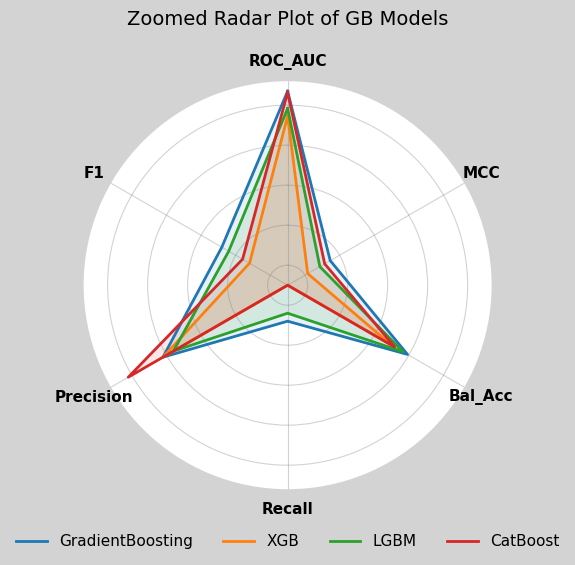

In [ ]:
#Spider Plot Of GB Models
models_metrics = {
    "GradientBoosting": {"ROC_AUC": 0.835, "MCC": 0.473, "Bal_Acc": 0.696, "Recall": 0.44, "Precision": 0.71, "F1": 0.54},
    "XGB":              {"ROC_AUC": 0.773, "MCC": 0.408, "Bal_Acc": 0.651, "Recall": 0.34, "Precision": 0.71, "F1": 0.46},
    "LGBM":             {"ROC_AUC": 0.792, "MCC": 0.443, "Bal_Acc": 0.683, "Recall": 0.42, "Precision": 0.68, "F1": 0.52},
    "CatBoost":         {"ROC_AUC": 0.832, "MCC": 0.457, "Bal_Acc": 0.659, "Recall": 0.34, "Precision": 0.81, "F1": 0.48},}

axes = ["ROC_AUC", "MCC", "Bal_Acc", "Recall", "Precision", "F1"]
N = len(axes)
#Zoom window
rmin, rmax = 0.35, 0.86
def norm(v): 
    return (v - rmin) / (rmax - rmin)
angles = np.linspace(0, 2*np.pi, N, endpoint=False)
angles = np.concatenate([angles, [angles[0]]])

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True), facecolor='lightgrey')
#Orientation
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
#Axis Labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(axes, fontsize=11, fontweight="bold")
for lbl in ax.get_yticklabels():
    lbl.set_zorder(20)
    lbl.set_clip_on(False)
#Radial Scale
ax.set_ylim(0, 1)
rticks_raw = np.array([0.40, 0.50, 0.60, 0.70, 0.80])
rticks = [norm(v) for v in rticks_raw]
ax.set_yticks(rticks) 
ax.set_yticklabels([]) #Remove Labels
ax.set_rlabel_position(90)
#Grid Style
ax.grid(color="gray", alpha=0.35, linewidth=0.8)
#Remove outer ring
ax.spines["polar"].set_visible(False)
for name, m in models_metrics.items():
    raw_vals = [m[a] for a in axes]
    raw_vals = [min(max(v, rmin), rmax) for v in raw_vals]
    vals = [norm(v) for v in raw_vals]
    vals = vals + [vals[0]]
    ax.plot(angles, vals, linewidth=2)
    ax.fill(angles, vals, alpha=0.10)

ax.set_title("Zoomed Radar Plot of GB Models\n", fontsize=14, pad=25)
legend_handles = [
    Line2D([0], [0], color=line.get_color(), lw=2)
    for line in ax.get_lines()[:len(models_metrics)]]
ax.legend(
    legend_handles,
    models_metrics.keys(),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=4,
    frameon=False,
    fontsize=11)
plt.subplots_adjust(top=0.88, bottom=0.20)
# fig.savefig('/Users/matthewplambeck/Desktop/Convoy Predictor/Plots/GB_Radar_Plot.png', bbox_inches='tight')
plt.show()

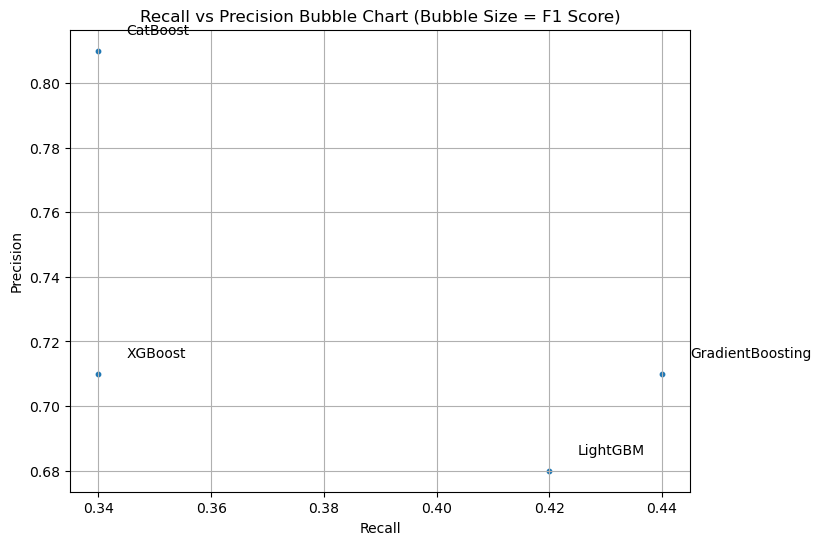

In [ ]:
#Plot to Visualize Boost Models (TODO: CLEAN UP)

models = [
    "GradientBoosting",
    "XGBoost",
    "LightGBM",
    "CatBoost"]
recall = [0.44, 0.34, 0.42, 0.34]
precision = [0.71, 0.71, 0.68, 0.81]  
f1 = [0.54, 0.46, 0.52, 0.48]
#Bubble sizes (scale F1 for visibility)
sizes = [f * 1000 for f in f1]
#Plot
plt.figure(figsize=(8, 6))
plt.scatter(recall, precision, s=10)
#Labels for each point
for i, model in enumerate(models):
    plt.text(recall[i] + 0.005, precision[i] + 0.005, model)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall vs Precision Bubble Chart (Bubble Size = F1 Score)")
plt.grid(True)
plt.show()

